<a href="https://colab.research.google.com/github/EOKELLO/IP-WEEK1-CORE/blob/master/2Moringa_Data_Science_Core_W1_Independent_Project_2019_07_Elizabeth_Okello_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#import important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

In [0]:
#we state our hypothesis

#which individuals are likely to use or have a bank account.

In [3]:
#we now load our dataset
df = pd.read_csv('Financial Dataset.csv')
df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [0]:
#we now remane out dataset columns to make the column name uniform with the informaton captured in the data description
df = df.rename(columns={'The relathip with head':'relationship_with_head',
                         'Type of Location':'location_type',
                         'Cell Phone Access':'cellphone_access',
                         'Respondent Age':'age_of_respondent',
                         'Level of Educuation':'education_level',
                         'Type of Job':'job_type'})


In [5]:
df.head()

,country,year,uniqueid,Has a Bank account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


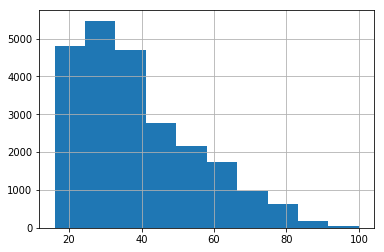

In [6]:
df['age_of_respondent'].hist()

In [7]:
df.columns

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

In [8]:
#we want to understand our dataset by checking the number of records,missing values and data types
df.shape

(23524, 13)

In [9]:
df.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
location_type              object
cellphone_access           object
household_size            float64
age_of_respondent         float64
gender_of_respondent       object
relationship_with_head     object
marital_status             object
education_level            object
job_type                   object
dtype: object

In [10]:
df.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
location_type             15
cellphone_access          11
household_size            28
age_of_respondent         34
gender_of_respondent      34
relationship_with_head     4
marital_status            32
education_level           29
job_type                  30
dtype: int64

In [11]:
#we the proceed to treat our missing values
missing_data=df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

country
False    23510
True        14
Name: country, dtype: int64

year
False    23524
Name: year, dtype: int64

uniqueid
False    23524
Name: uniqueid, dtype: int64

Has a Bank account
False    23488
True        36
Name: Has a Bank account, dtype: int64

location_type
False    23509
True        15
Name: location_type, dtype: int64

cellphone_access
False    23513
True        11
Name: cellphone_access, dtype: int64

household_size
False    23496
True        28
Name: household_size, dtype: int64

age_of_respondent
False    23490
True        34
Name: age_of_respondent, dtype: int64

gender_of_respondent
False    23490
True        34
Name: gender_of_respondent, dtype: int64

relationship_with_head
False    23520
True         4
Name: relationship_with_head, dtype: int64

marital_status
False    23492
True        32
Name: marital_status, dtype: int64

education_level
False    23495
True        29
Name: education_level, dtype: int64

job_type
False    23494
True        30
Name: job_type, dty

In [0]:
#we now fill in missing values with the respective modes of each attribute
categorical_columns = ['country','gender_of_respondent', 'relationship_with_head', 'marital_status','location_type','cellphone_access','education_level','job_type']
for column in categorical_columns:
  df[column] = df[column].fillna(df[column].mode().iloc[0])

In [0]:
#we replace NaN value with the most common house_hold size
df['household_size'] = df['household_size'].fillna(df['household_size'].mode().iloc[0])

In [0]:
#find the mode in the column age_of_respondent and use it to replace the nan values.
df['age_of_respondent'] = df['age_of_respondent'].fillna(df['age_of_respondent'].mode().iloc[0])

In [0]:
#there is an anomaly in the education level
df['education_level'].unique()
df['education_level']=df['education_level']

In [16]:
#check whether we successfully treated the missing values
df.isnull().sum()

country                    0
year                       0
uniqueid                   0
Has a Bank account        36
location_type              0
cellphone_access           0
household_size             0
age_of_respondent          0
gender_of_respondent       0
relationship_with_head     0
marital_status             0
education_level            0
job_type                   0
dtype: int64

In [17]:
#we check whether our variable data types are as expected
df.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
location_type              object
cellphone_access           object
household_size            float64
age_of_respondent         float64
gender_of_respondent       object
relationship_with_head     object
marital_status             object
education_level            object
job_type                   object
dtype: object

In [0]:
#all our ariable data types are fine except for house hold size so to correct this we do the conversion
df['household_size']=df['household_size'].astype("float")

In [19]:
#we check if this is converted
df.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
location_type              object
cellphone_access           object
household_size            float64
age_of_respondent         float64
gender_of_respondent       object
relationship_with_head     object
marital_status             object
education_level            object
job_type                   object
dtype: object

In [0]:
#we now have all missing values treated, variable data types in the correct format

In [0]:
#we delete the columns we may not need like the uniqueid
df=df.drop('uniqueid', axis=1)


In [22]:
df.head(2)

,country,year,Has a Bank account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent


**UNIVARIATE** **ANALYSIS**

In [0]:
#majorly highlghts the distribution of data variables. 

In [0]:
#we drop the columns we may not need for making our prediction
df=df.drop(['year','country'], axis=1)

In [25]:
df.head(1)

,Has a Bank account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed


**Univariate** **Analysis**

In [0]:
#in this section we want to check for the distribution of the individual variables across the data set

In [27]:
df['household_size'].describe()

count    23524.000000
mean         3.679816
std          2.279314
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         21.000000
Name: household_size, dtype: float64

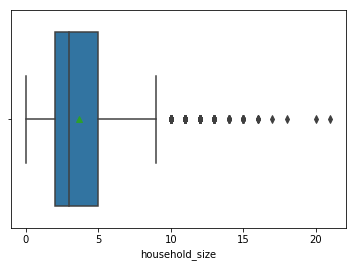

In [28]:
sns.boxplot(df['household_size'],showmeans=True)

In [29]:
#we check for distinct values in the column
df['household_size'].unique()

array([ 3.,  5.,  8.,  7.,  1.,  6.,  4., 10.,  2., 11.,  9., 12., 16.,
       15., 13., 14., 21.,  0., 18., 17., 20.])

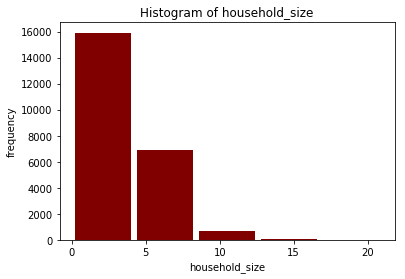

In [72]:

household_size = df['household_size']

plt.hist(household_size, bins=5, histtype='bar', rwidth=0.9, color='maroon')
plt.xlabel('household_size')
plt.ylabel('frequency')
plt.title('Histogram of household_size')
plt.show()

In [31]:
#we check for the distribution of the ages of the respondents
df['age_of_respondent'].describe()

count    23524.000000
mean        38.791575
std         16.511441
min         16.000000
25%         26.000000
50%         35.000000
75%         49.000000
max        100.000000
Name: age_of_respondent, dtype: float64

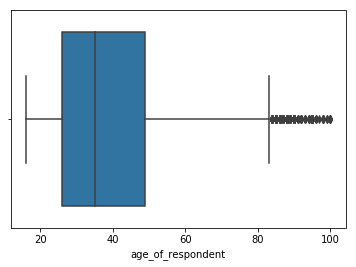

In [32]:
sns.boxplot(df['age_of_respondent'])

In [33]:
df['age_of_respondent'].unique()

array([ 24.,  70.,  26.,  34.,  32.,  42.,  54.,  76.,  40.,  69.,  64.,
        31.,  38.,  47.,  27.,  48.,  25.,  21.,  18.,  22.,  58.,  55.,
        62.,  29.,  35.,  45.,  67.,  19.,  80.,  66.,  50.,  33.,  28.,
        51.,  16.,  17.,  30.,  37.,  59.,  65.,  46.,  56.,  52.,  23.,
        43.,  49.,  44.,  72.,  53.,  63.,  39.,  81.,  78.,  36.,  20.,
        60.,  95.,  71.,  57.,  85.,  68.,  41.,  61.,  75.,  86.,  73.,
        93.,  74.,  88.,  90.,  77.,  84.,  82.,  89.,  79.,  83.,  94.,
        87.,  92.,  91.,  98.,  97.,  96.,  99., 100.])

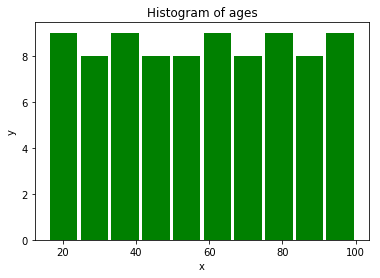

In [34]:
ages=[ 24.,  70.,  26.,  34.,  32.,  42.,  54.,  76.,  40.,  69.,  64.,
        31.,  38.,  47.,  27.,  48.,  25.,  21.,  18.,  22.,  58.,  55.,
        62.,  29.,  35.,  45.,  67.,  19.,  80.,  66.,  50.,  33.,  28.,
        51.,  16.,  17.,  30.,  37.,  59.,  65.,  46.,  56.,  52.,  23.,
        43.,  49.,  44.,  72.,  53.,  63.,  39.,  81.,  78.,  36.,  20.,
        60.,  95.,  71.,  57.,  85.,  68.,  41.,  61.,  75.,  86.,  73.,
        93.,  74.,  88.,  90.,  77.,  84.,  82.,  89.,  79.,  83.,  94.,
        87.,  92.,  91.,  98.,  97.,  96.,  99., 100.]
bins=[0,10,20,30,40,50,60,70,80,90,100]
plt.hist(ages, bins=10, histtype='bar', rwidth=0.9,color='green')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Histogram of ages') 
plt.show()

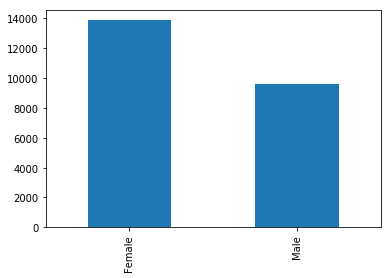

In [77]:
df['gender_of_respondent'].value_counts().sort_index().head(10).plot.bar()


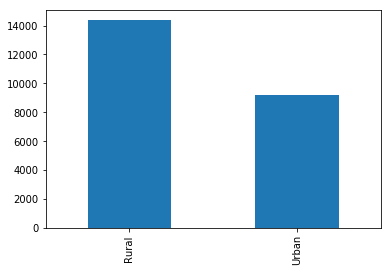

In [36]:
df['location_type'].value_counts().plot.bar()

In [79]:
rural_dist = df[df.location_type=='Rural']
rural_colors = ['red' if location_type== Rural else 'blue'if location_type in rural_dist.]

SyntaxError: ignored

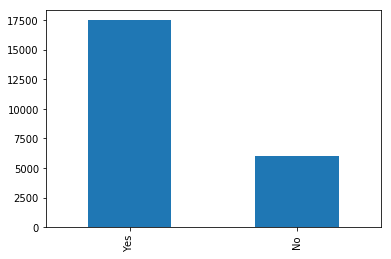

In [37]:
df['cellphone_access'].value_counts().plot.bar()

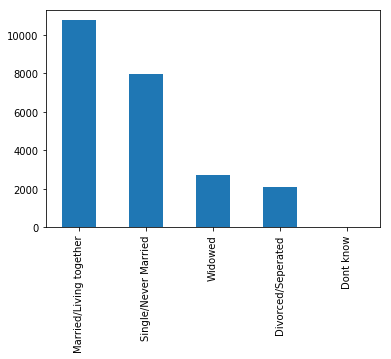

In [38]:
df['marital_status'].value_counts().head(10).plot.bar()

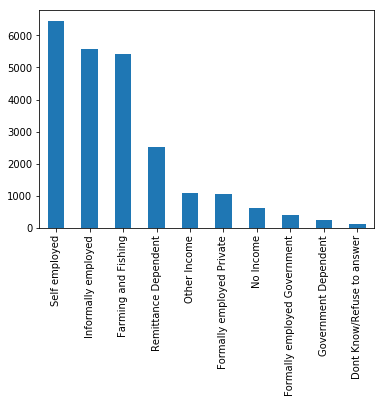

In [39]:
df['job_type'].value_counts().head(10).plot.bar()

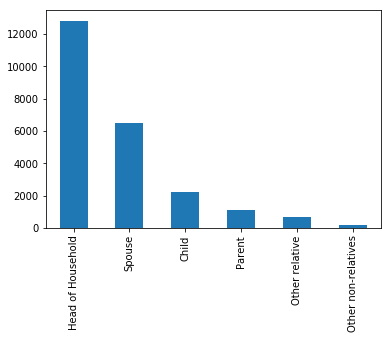

In [40]:
df['relationship_with_head'].value_counts().head(10).plot.bar()

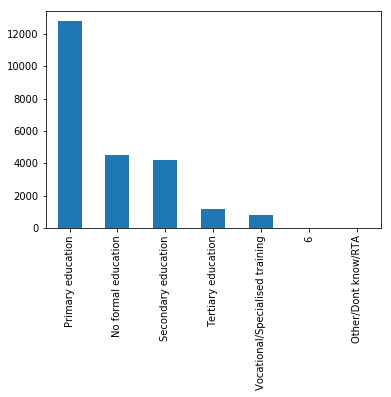

In [41]:
df['education_level'].value_counts().head(10).plot.bar()

In [42]:
df["age_of_respondent"].skew()

0.8439847622246852

In [43]:
df["household_size"].skew()

0.9794417680810276

BIVARIATE ANALYSIS

In [0]:
#we want to check for the distribution od variables and how they relate to one another . we shall also be establishing
#the strength of relationship if there exists

<Figure size 576x432 with 0 Axes>

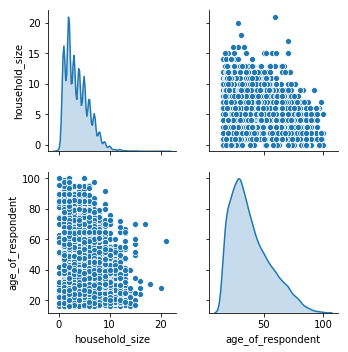

In [45]:

plt.figure(figsize=(8, 6))

sns.pairplot(df, diag_kind='kde')

In [0]:
#in the above plots we see no relationship between the two variables

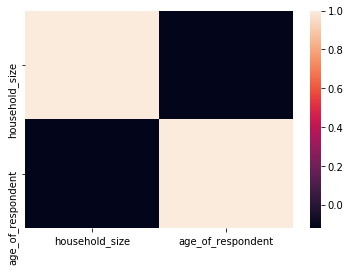

In [47]:
sns.heatmap(df.corr())
#the black shades confirm that there is completely no relationship between the two variables

Distributions of observations within categories

Text(0.5, 1.0, 'education level vs age of respondent')

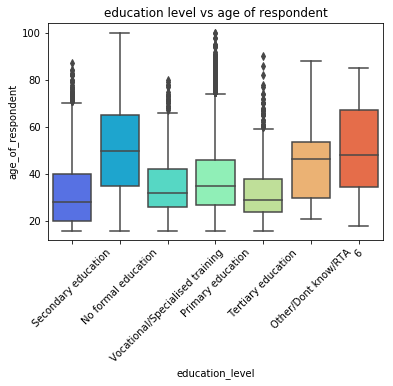

In [48]:
#we can use this to visualize how our observations are distributed within the various categories.
#we can say that the ages of the respondents in the category of educ level those with no formal education were more and older compared to the rest

sns.boxplot(x='education_level',y='age_of_respondent',data=df,palette='rainbow')
plt.xticks(rotation = 45)
plt.title('education level vs age of respondent')


Text(0.5, 1.0, 'job_type vs age of respondent')

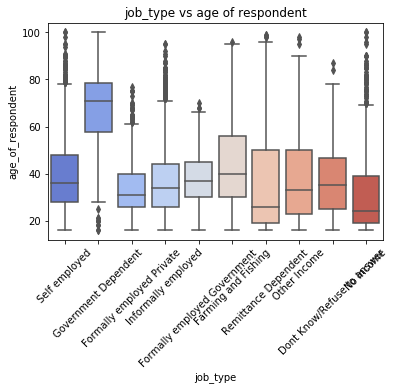

In [49]:
sns.boxplot(x='job_type',y='age_of_respondent',data=df,palette='coolwarm')
plt.xticks(rotation = 45)
plt.title('job_type vs age of respondent')

Text(0.5, 1.0, 'gender_of_respondent vs age of respondent')

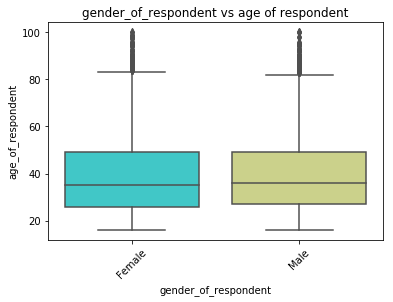

In [50]:
sns.boxplot(x='gender_of_respondent',y='age_of_respondent',data=df,palette='rainbow')
plt.xticks(rotation = 45)
plt.title('gender_of_respondent vs age of respondent')


Text(0.5, 1.0, 'gender_of_respondent vs household_size')

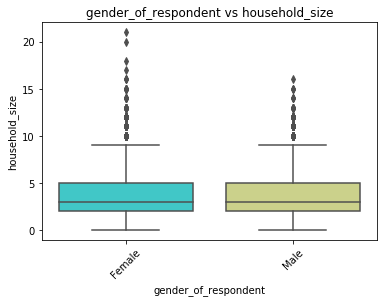

In [51]:
sns.boxplot(x='gender_of_respondent',y='household_size',data=df,palette='rainbow')
plt.xticks(rotation = 45)
plt.title('gender_of_respondent vs household_size')


Text(0.5, 1.0, 'marital_status vs age of respondent')

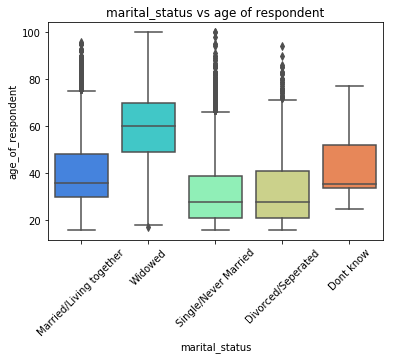

In [52]:
sns.boxplot(x='marital_status',y='age_of_respondent',data=df,palette='rainbow')
plt.xticks(rotation = 45)
plt.title('marital_status vs age of respondent')


MULTIVARIATE ANALYSIS

In [0]:
#multiple regression
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import accuracy_score

In [0]:
#From our dataset we to divide dataset 
# into features and corresponding labels and then divide the resultant dataset into training and test sets.
X = df.iloc[:, 2:11]
y = df.iloc[:, 1]

In [0]:
#because the data is categorical we have to make them in aa form that we can run a regression model on it
X=pd.get_dummies(X)

In [0]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [57]:
X.head()

,household_size,age_of_respondent,cellphone_access_No,cellphone_access_Yes,gender_of_respondent_Female,gender_of_respondent_Male,relationship_with_head_Child,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,relationship_with_head_Other relative,relationship_with_head_Parent,relationship_with_head_Spouse,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,education_level_6,education_level_No formal education,education_level_Other/Dont know/RTA,education_level_Primary education,education_level_Secondary education,education_level_Tertiary education,education_level_Vocational/Specialised training,job_type_Dont Know/Refuse to answer,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed
0,3.0,24.0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,5.0,70.0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,5.0,26.0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,5.0,34.0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,8.0,26.0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [58]:
X.shape

(23524, 34)

In [0]:
#the following code divides data into training and test sets
#
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [0]:
# We now need to perform feature scaling. We execute the following code to do so:
# 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [61]:
X.corr()

,household_size,age_of_respondent,cellphone_access_No,cellphone_access_Yes,gender_of_respondent_Female,gender_of_respondent_Male,relationship_with_head_Child,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,relationship_with_head_Other relative,relationship_with_head_Parent,relationship_with_head_Spouse,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,education_level_6,education_level_No formal education,education_level_Other/Dont know/RTA,education_level_Primary education,education_level_Secondary education,education_level_Tertiary education,education_level_Vocational/Specialised training,job_type_Dont Know/Refuse to answer,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed
household_size,1.000000,-0.119212,-0.098726,0.098726,-0.011329,0.011329,0.204270,-0.243698,0.021011,0.013798,0.042370,0.108263,-0.129416,-0.008536,0.345770,-0.182788,-0.153418,0.002008,-0.007311,0.004614,-0.024692,0.104180,-0.095932,-0.023203,0.024107,0.188149,0.002773,-0.071118,-0.045911,0.013800,-0.065799,0.062540,0.008988,-0.163918
age_of_respondent,-0.119212,1.000000,0.103758,-0.103758,-0.013123,0.013123,-0.302048,0.419421,-0.078538,-0.134724,-0.196217,-0.111259,-0.119497,0.005260,0.054198,-0.296593,0.461496,0.024000,0.359671,0.009449,-0.071641,-0.209862,-0.090700,-0.037003,-0.002777,0.153382,-0.005634,-0.061839,0.171570,-0.088909,-0.060762,-0.014441,-0.057750,0.000237
cellphone_access_No,-0.098726,0.103758,1.000000,-1.000000,0.102115,-0.102115,0.003786,-0.056033,-0.023863,0.030310,0.049116,0.030356,0.028764,-0.005599,-0.157912,0.065754,0.123893,0.011596,0.204348,-0.005599,0.009639,-0.119766,-0.099806,-0.099015,-0.001971,-0.111498,-0.071634,-0.105631,0.058474,0.008630,0.104005,0.006779,0.083016,0.055152
cellphone_access_Yes,0.098726,-0.103758,-1.000000,1.000000,-0.102115,0.102115,-0.003786,0.056033,0.023863,-0.030310,-0.049116,-0.030356,-0.028764,0.005599,0.157912,-0.065754,-0.123893,-0.011596,-0.204348,0.005599,-0.009639,0.119766,0.099806,0.099015,0.001971,0.111498,0.071634,0.105631,-0.058474,-0.008630,-0.104005,-0.006779,-0.083016,-0.055152
gender_of_respondent_Female,-0.011329,-0.013123,0.102115,-0.102115,1.000000,-1.000000,-0.042925,-0.413223,-0.001170,-0.012238,-0.010867,0.497688,-0.004484,-0.017464,-0.056086,-0.085768,0.219947,0.005245,0.114633,-0.003398,-0.019249,-0.058196,-0.041081,-0.024397,0.006616,0.001094,-0.028923,-0.061431,0.023854,-0.052741,0.073371,0.011221,0.120213,-0.035647
gender_of_respondent_Male,0.011329,0.013123,-0.102115,0.102115,-1.000000,1.000000,0.042925,0.413223,0.001170,0.012238,0.010867,-0.497688,0.004484,0.017464,0.056086,0.085768,-0.219947,-0.005245,-0.114633,0.003398,0.019249,0.058196,0.041081,0.024397,-0.006616,-0.001094,0.028923,0.061431,-0.023854,0.052741,-0.073371,-0.011221,-0.120213,0.035647
relationship_with_head_Child,0.204270,-0.302048,0.003786,-0.003786,-0.042925,0.042925,1.000000,-0.354463,-0.029194,-0.055310,-0.071177,-0.200296,0.008025,0.001905,-0.267905,0.334782,-0.085592,-0.010967,-0.110270,0.009777,-0.077299,0.210387,0.010384,-0.004866,0.000121,0.000758,-0.020162,-0.034339,-0.017664,0.028517,-0.017492,-0.003700,0.196901,-0.130721
relationship_with_head_Head of Household,-0.243698,0.419421,-0.056033,0.056033,-0.413223,0.413223,-0.354463,1.000000,-0.098864,-0.187302,-0.241034,-0.678283,0.011346,0.007574,-0.013517,-0.187301,0.288633,0.000683,0.123195,0.002944,-0.012332,-0.115736,-0.002224,0.013608,0.002648,0.025757,0.037505,0.057942,0.058844,0.016077,-0.110274,-0.012715,-0.152801,0.060639
relationship_with_head_Other non-relatives,0.021011,-0.078538,-0.023863,0.023863,-0.001170,0.001170,-0.029194,-0.098864,1.000000,-0.015427,-0.019852,-0.055865,0.047365,-0.001664,-0.0

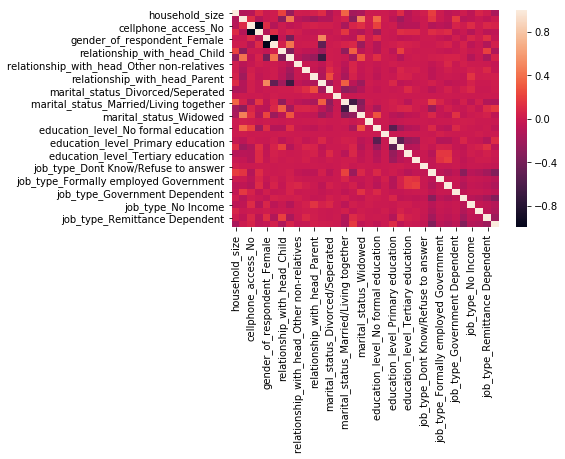

In [62]:
sns.heatmap(X.corr())

In [0]:
#We then create and train the model by fitting the linear regression model on the training data.
lm = LinearRegression()
results = lm.fit(X_train,y_train)

In [0]:
#Grabbing predictions off the test set and see how well it did
predictions = lm.predict(X_test)

In [65]:

X2 = sm.add_constant(X.values)  
model = sm.OLS(y, X2).fit()  
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.241
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     266.6
Date:                Fri, 16 Aug 2019   Prob (F-statistic):               0.00
Time:                        11:15:20   Log-Likelihood:                -13243.
No. Observations:               23524   AIC:                         2.654e+04
Df Residuals:                   23495   BIC:                         2.678e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2255      0.016     14.316      0.0

In [0]:
#this model is not appropriate for modelling this kind of data. having assumed that there exists a linear relationship the relationship is too weak and absent in most variables 
#therefore yields a very poor model looking at the rsquared and adjusted -squared 

**Linear** **Discriminant** **Analysis**

In [67]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [68]:
# Training and Making Predictions
# We will use the random forest classifier to evaluate the performance of a PCA-reduced algorithms as shown
# 

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [69]:
# Evaluating the Performance
# As always, the last step is to evaluate performance of the algorithm 
# with the help of a confusion matrix and find the accuracy of the prediction.
# 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

[[2232  644]
 [ 639 1190]]
Accuracy0.7273113708820403


In [0]:
#we can also try pca
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [71]:
# Using 1 Principal Component
# Let's first try to use 1 principal component to train our algorithm. To do so, execute the following code:
# 
from sklearn.decomposition import PCA

pca = PCA(n_components=23)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

ValueError: ignored

In [0]:
#Training and Making Predictions
# In this case we'll use random forest classification for making the predictions.
# 
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [0]:
#Performance Evaluation
# 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))


In [0]:
#from the above methods we attained an accuracy of 88%
#our data was sufficient.
#the data was relevant for our prediction